In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import math
import datetime as dt
import itertools
import random
import scipy.stats as stats
import seaborn as sns

In [ ]:
df_type = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/01.MIMICIV_SAKI_trajCluster/df_mixAK_fea4_C3.csv")
df_type_filt = df_type.loc[:,["stay_id","groupHPD"]]
df_type_filt = df_type_filt.drop_duplicates()
all_lst = df_type_filt.stay_id.unique().tolist()
print("Number of included patients:",len(all_lst))
df_type_filt["groupHPD"].value_counts()


In [3]:
df_sk_first_and_max_stage = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/disease_definition/AKI/sk_first_and_max_stage.csv")
df_sk_first_and_max_stage = df_sk_first_and_max_stage.loc[:,["stay_id","first_aki_stage", "max_aki_stage","aki_endstage"]]
df_sk_first_and_max_stage = pd.merge(df_sk_first_and_max_stage, df_type_filt, how="inner", on = "stay_id")
df_sk_first_and_max_stage.head(1)

,stay_id,first_aki_stage,max_aki_stage,aki_endstage,groupHPD
0,30003598,2,3,0,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.792e-01 U_stat=1.982e+06
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.560e-01 U_stat=5.326e+05
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.820e-01 U_stat=2.262e+05


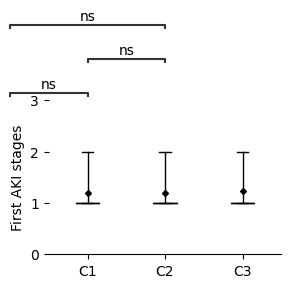

In [4]:
df = df_sk_first_and_max_stage
df["aki_stage"] = df["first_aki_stage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
f1 = plt.boxplot([df[df["groupHPD"]==1]["aki_stage"], df[df["groupHPD"]==2]["aki_stage"], df[df["groupHPD"]==3]["aki_stage"]],
           whis=(10,90),showfliers=False,showmeans=True,patch_artist=True,meanprops={'marker':'D','markerfacecolor':'black','markersize':3,'markeredgecolor':'black'},medianprops={'color':'black'}) 
color = ["#74a8ff","#3fc968","#f8746a"]
for box,c in zip(f1['boxes'], color):
    box.set(facecolor = c,edgecolor='black')
plt.ylim([0,3])   
plt.ylabel("First AKI stages")
plt.xticks([1,2,3],["C1","C2","C3"]) 

from statannotations.Annotator import Annotator
box_pairs = [(2,1),(3,1),(3,2)]
fig_args = {'x': 'groupHPD',
            'y': 'aki_stage',
            'data': df,
            'dodge': True}
annotator = Annotator(ax=ax, pairs=box_pairs, **fig_args)

# fig_args_horiz = {**fig_args,'x': 'during_time', 'y': 'groupHPD'}
configuration = {'test':'Mann-Whitney', 'comparisons_correction':None, 'text_format':'star', 'loc':'outside'}
# annotator.new_plot(ax, orient='h', **fig_args_horiz)
annotator.configure(**configuration).apply_test()
annotator.apply_and_annotate()
plt.savefig('./result/First_AKI_stages.pdf', bbox_inches = 'tight')
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.966e-12 U_stat=2.197e+06
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.577e-128 U_stat=2.011e+05
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.259e-60 U_stat=1.156e+05


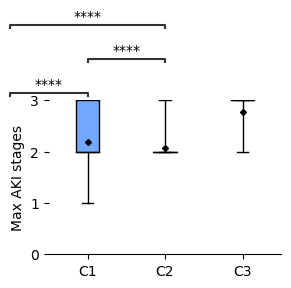

In [5]:
df = df_sk_first_and_max_stage
df["aki_stage"] = df["max_aki_stage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
f1 = plt.boxplot([df[df["groupHPD"]==1]["aki_stage"], df[df["groupHPD"]==2]["aki_stage"], df[df["groupHPD"]==3]["aki_stage"]],
           whis=(10,90),showfliers=False,showmeans=True, patch_artist=True,meanprops={'marker':'D','markerfacecolor':'black','markersize':3,'markeredgecolor':'black'},medianprops={'color':'black'}) 
color = ["#74a8ff","#3fc968","#f8746a"]
for box,c in zip(f1['boxes'], color):
    box.set(facecolor = c,edgecolor='black')
plt.ylim([0,3])   
plt.ylabel("Max AKI stages")
plt.xticks([1,2,3],["C1","C2","C3"]) 

from statannotations.Annotator import Annotator
box_pairs = [(2,1),(3,1),(3,2)]
fig_args = {'x': 'groupHPD',
            'y': 'aki_stage',
            'data': df,
            'dodge': True}
annotator = Annotator(ax=ax, pairs=box_pairs, **fig_args)

# fig_args_horiz = {**fig_args,'x': 'during_time', 'y': 'groupHPD'}
configuration = {'test':'Mann-Whitney', 'comparisons_correction':None, 'text_format':'star', 'loc':'outside'}
# annotator.new_plot(ax, orient='h', **fig_args_horiz)
annotator.configure(**configuration).apply_test()
annotator.apply_and_annotate()
plt.savefig('./result/Max_AKI_stages.pdf', bbox_inches = 'tight')
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.149e-10 U_stat=2.192e+06
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:5.991e-80 U_stat=2.601e+05
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.652e-44 U_stat=1.294e+05


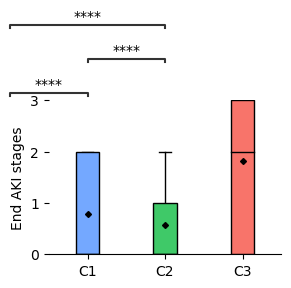

In [6]:
df = df_sk_first_and_max_stage
df["aki_stage"] = df["aki_endstage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
f1 = plt.boxplot([df[df["groupHPD"]==1]["aki_stage"], df[df["groupHPD"]==2]["aki_stage"], df[df["groupHPD"]==3]["aki_stage"]],
           whis=(10,90),showfliers=False,showmeans=True, patch_artist=True,meanprops={'marker':'D','markerfacecolor':'black','markersize':3,'markeredgecolor':'black'},medianprops={'color':'black'}) 
color = ["#74a8ff","#3fc968","#f8746a"]
for box,c in zip(f1['boxes'], color):
    box.set(facecolor = c,edgecolor='black')
plt.ylim([0,3])   
plt.ylabel("End AKI stages")
plt.xticks([1,2,3],["C1","C2","C3"]) 

from statannotations.Annotator import Annotator
box_pairs = [(2,1),(3,1),(3,2)]
fig_args = {'x': 'groupHPD',
            'y': 'aki_stage',
            'data': df,
            'dodge': True}
annotator = Annotator(ax=ax, pairs=box_pairs, **fig_args)

# fig_args_horiz = {**fig_args,'x': 'during_time', 'y': 'groupHPD'}
configuration = {'test':'Mann-Whitney', 'comparisons_correction':None, 'text_format':'star', 'loc':'outside'}
# annotator.new_plot(ax, orient='h', **fig_args_horiz)
annotator.configure(**configuration).apply_test()
annotator.apply_and_annotate()
plt.savefig('./result/End_AKI_stages.pdf', bbox_inches = 'tight')
plt.show()

# Distribution on Stages

1 1.199537750385208
2 1.2009819967266775
3 1.2333333333333334


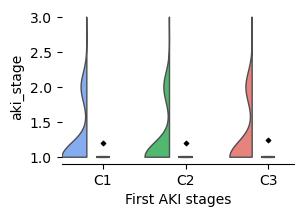

In [ ]:
import ptitprince as pt
# Cloud and rain Figure
df = df_sk_first_and_max_stage
df["aki_stage"] = df["first_aki_stage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax = pt.RainCloud(x="groupHPD", y="aki_stage", data=df, palette= ["#74a8ff","#3fc968","#f8746a"], bw=.5, width_viol=.6, move=.2, point_size=0,box_showfliers=False, ax=ax)


plt.xlabel("First AKI stages")
plt.xticks([0,1,2],["C1","C2","C3"]) 

# Add mean value
for group, values in df.groupby('groupHPD')['aki_stage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)

plt.show()

1 2.1818181818181817
2 2.0631751227495907
3 2.772222222222222


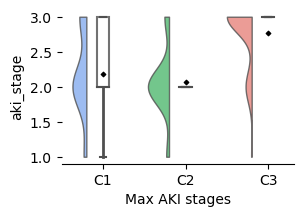

In [ ]:
import ptitprince as pt
df = df_sk_first_and_max_stage
df["aki_stage"] = df["max_aki_stage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax = pt.RainCloud(x="groupHPD", y="aki_stage", data=df, palette= ["#74a8ff","#3fc968","#f8746a"], bw=.5, width_viol=.6, move=.2, 
                  point_size=0,box_showfliers=False,alpha=0.8, ax=ax)

# Add mean value
for group, values in df.groupby('groupHPD')['aki_stage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)
    
plt.xlabel("Max AKI stages")
plt.xticks([0,1,2],["C1","C2","C3"]) 
plt.show()

1 0.7842835130970724
2 0.5797054009819967
3 1.8222222222222222


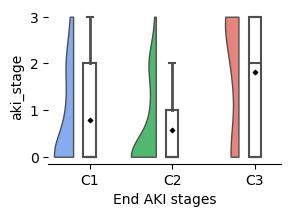

In [ ]:
import ptitprince as pt
df = df_sk_first_and_max_stage
df["aki_stage"] = df["aki_endstage"]
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(3,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax = pt.RainCloud(x="groupHPD", y="aki_stage", data=df, palette= ["#74a8ff","#3fc968","#f8746a"], bw=.5, width_viol=.6, move=.2, point_size=0,box_showfliers=False, ax=ax)

# Add mean value
for group, values in df.groupby('groupHPD')['aki_stage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)
plt.xlabel("End AKI stages")
plt.xticks([0,1,2],["C1","C2","C3"]) 
plt.show()

1 1.2009819967266775
2 1.199537750385208
3 1.2333333333333334
1 2.0631751227495907
2 2.1818181818181817
3 2.772222222222222
1 0.5797054009819967
2 0.7842835130970724
3 1.8222222222222222


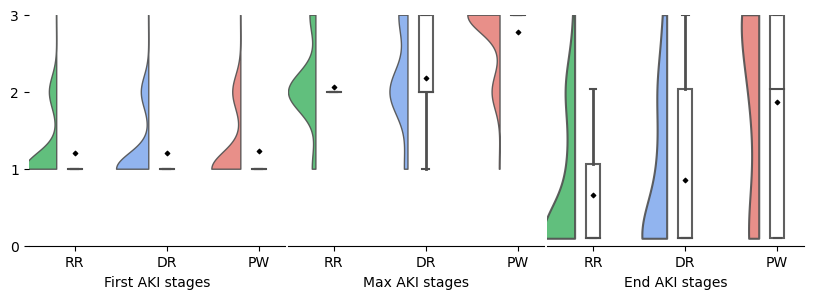

In [ ]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,3))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1])

positions = {
    1: 2,
    2: 1,
    3: 3,
}
df_sk_first_and_max_stage['x_position'] = df_sk_first_and_max_stage['groupHPD'].map(positions)

ax1 = plt.subplot(gs[0])
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1 = pt.RainCloud(x="x_position", y="first_aki_stage", data=df_sk_first_and_max_stage, palette=[ "#3fc968","#74a8ff", "#f8746a"], edgecolor='black',
                   bw=.5, width_viol=.7, move=.2, point_size=0, alpha=0.9, box_showfliers=False, ax=ax1)
for group, values in df_sk_first_and_max_stage.groupby('x_position')['first_aki_stage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax1.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)
ax1.set_ylim(0,3)
ax1.set_ylabel("")
plt.xlabel("First AKI stages")
plt.xticks([0, 1, 2], ["RR", "DR", "PW"])
plt.yticks([0, 1, 2,3])

ax2 = plt.subplot(gs[1])
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2 = pt.RainCloud(x="x_position", y="max_aki_stage", data=df_sk_first_and_max_stage, palette=[ "#3fc968","#74a8ff", "#f8746a"],  edgecolor='black',
                   bw=.5, width_viol=.7, move=.2, point_size=0, box_showfliers=False, alpha=0.9, ax=ax2)
for group, values in df_sk_first_and_max_stage.groupby('x_position')['max_aki_stage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax2.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)
ax2.set_ylabel("")
ax2.set_yticks([])
ax2.set_ylim(0,3)
plt.xlabel("Max AKI stages")
plt.xticks([0, 1, 2], ["RR", "DR", "PW"])
plt.setp(ax2.get_yticklabels(), visible=False)   

ax3 = plt.subplot(gs[2])
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3 = pt.RainCloud(x="x_position", y="aki_endstage", data=df_sk_first_and_max_stage, edgecolor='black',linewidth=1.5,
                   palette=["#3fc968", "#74a8ff",  "#f8746a"], bw=.5, width_viol=.7, move=.01, point_size=0,alpha=0.9, box_showfliers=False, ax=ax3)
for group, values in df_sk_first_and_max_stage.groupby('x_position')['aki_endstage']:
    mean_value = values.mean()
    print(group,mean_value)
    group = group-1
    ax3.scatter([group], [mean_value], color='black', marker='D', s=5, zorder=3)
plt.xlabel("End AKI stages")
plt.xticks([0, 1, 2], ["RR", "DR", "PW"])
ax3.set_ylim(-0.1,3)
ax3.set_yticks([])  
ax3.set_ylabel("")

# 调整每个子图之间的距离
plt.subplots_adjust(wspace=0.01)  # 根据需要调整wspace的值
plt.savefig('./result/First_max_end_AKI_stages.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = {"RR": "#3fc968", "DW": "#74a8ff", "PW": "#f8746a"}
labels = list(colors.keys())
handles = [mpatches.Patch(color=colors[label], label=label) for label in labels]

legend = plt.legend(handles, labels, bbox_to_anchor=(-0.2, 0.8), loc=0, borderaxespad=0, frameon=False)
for legend_handle in legend.legendHandles:
    legend_handle.set_edgecolor('black')

plt.savefig('./result/First_max_end_AKI_stages_legend.pdf', bbox_inches='tight')
plt.show()


# Distribution in time

In [ ]:
# first to max
df_time = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/disease_definition/AKI/sk_first_and_max_stage.csv")
df_time = pd.merge(df_time,df_type_filt,how="inner",on="stay_id")
print("Patients with two-thirds of AKI at the initial diagnosis stage:",df_time[df_time["first_aki_stage"].isin([ 3])].shape[0])
df_time = df_time[~df_time["first_aki_stage"].isin([ 3])]

df_time["first_aki_onset"] = pd.to_datetime(df_time["first_aki_onset"])
df_time["max_aki_time"] = pd.to_datetime(df_time["max_aki_time"])
df_time = df_time[df_time["max_aki_stage"]!=df_time["first_aki_stage"]]
df_time["t_time"] = (df_time["max_aki_time"] - df_time["first_aki_onset"]).map(lambda x:x/np.timedelta64(24, 'h')).tolist()
df_time = df_time[["stay_id","t_time","groupHPD"]]
df_time["t_type"] ="First AKI to Max AKI stages"
df_time1 = df_time
df_time.head(1)

In [ ]:
# first to end
df_time = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_mimic/disease_definition/AKI/sk_first_and_max_stage.csv")
df_time = pd.merge(df_time,df_type_filt,how="inner",on="stay_id")
print("Patients with two-thirds of AKI at the initial diagnosis stage:",df_time[df_time["first_aki_stage"].isin([ 3])].shape[0])
df_time = df_time[~df_time["first_aki_stage"].isin([ 3])]

df_time["first_aki_onset"] = pd.to_datetime(df_time["first_aki_onset"])
df_time["aki_endtime"] = pd.to_datetime(df_time["aki_endtime"])
df_time["t_time"] = (df_time["aki_endtime"] - df_time["first_aki_onset"]).map(lambda x:x/np.timedelta64(24, 'h')).tolist()
df_time = df_time[["stay_id","t_time","groupHPD"]]
df_time["t_type"] ="First AKI to End AKI stages"
df_time2 = df_time
df_time.head(1)

In [14]:
df_time = pd.concat([df_time1,df_time2],axis=0)
df_time.head(1)

,stay_id,t_time,groupHPD,t_type
0,30003598,0.247222,1,First AKI to Max AKI stages


In [ ]:
# Output the median, mean and quantiles of each data group
def get_time(df_time_filt):
    data_groups = [df_time_filt["t_time"],
                   df_time_filt[df_time_filt["groupHPD"]==1]["t_time"],
                   df_time_filt[df_time_filt["groupHPD"]==2]["t_time"],
                   df_time_filt[df_time_filt["groupHPD"]==3]["t_time"]]

    df_out = pd.DataFrame(columns = ["class","Mean","q10","q25","q50","q75","q90"])
    for i, group_data in enumerate(data_groups):
        i = "C" + str(int(i)) 
        mean = round(np.mean(group_data),1)
        q10 = round(np.percentile(group_data, 10),1)
        q25 = round(np.percentile(group_data, 25),1)
        q50 = round(np.percentile(group_data, 50),1)
        q75 = round(np.percentile(group_data, 75),1)
        q90 = round(np.percentile(group_data, 90),1)
        df_out.loc[len(df_out)] = [i,mean,q10,q25,q50,q75,q90]
    return df_out
# C0 refers to all patients
df_time_filt = df_time[df_time["t_type"]=="First AKI to End AKI stages"]
get_time(df_time_filt)

,class,Mean,q10,q25,q50,q75,q90
0,C0,2.9,0.6,1.1,2.1,4.5,6.6
1,C1,3.5,0.8,1.5,3.0,5.6,6.8
2,C2,2.5,0.5,0.9,1.7,3.7,6.2
3,C3,3.8,1.0,1.5,3.3,6.6,7.0


In [23]:
df_time_filt = df_time[df_time["t_type"]=="First AKI to Max AKI stages"]
get_time(df_time_filt)

,class,Mean,q10,q25,q50,q75,q90
0,C0,0.8,0.1,0.2,0.3,0.9,2.2
1,C1,1.1,0.1,0.2,0.5,1.3,3.0
2,C2,0.7,0.1,0.2,0.2,0.7,1.7
3,C3,1.1,0.2,0.3,0.7,1.4,2.9


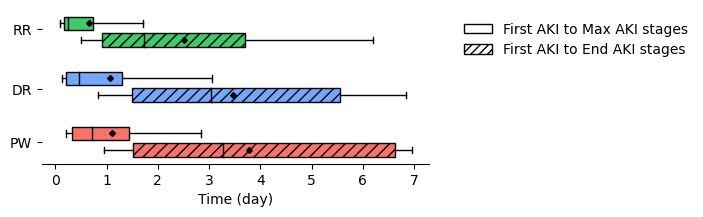

In [16]:

import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(5,2))
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False) 

df = df_time[df_time["t_type"]=='First AKI to Max AKI stages']
f1 = plt.boxplot([df[df["groupHPD"]==3]["t_time"], df[df["groupHPD"]==1]["t_time"], df[df["groupHPD"]==2]["t_time"]],
           whis=(10,90),showfliers=False,showmeans=True,vert=False,patch_artist=True,positions=[1,3,5],
                 meanprops={'marker':'D','markerfacecolor':'black','markersize':3,'markeredgecolor':'black'},medianprops={'color':'black'}) 
color = ["#f8746a", "#74a8ff","#3fc968"]
for box,c in zip(f1['boxes'], color):
    box.set(facecolor = c,edgecolor='black')

df = df_time[df_time["t_type"]=='First AKI to End AKI stages']
f2 = plt.boxplot([df[df["groupHPD"]==3]["t_time"], df[df["groupHPD"]==1]["t_time"], df[df["groupHPD"]==2]["t_time"]],
           whis=(10,90),showfliers=False,showmeans=True,vert=False,patch_artist=True,positions=[0.4,2.4,4.4],
                 meanprops={'marker':'D','markerfacecolor':'black','markersize':3,'markeredgecolor':'black'},
                 medianprops={'color':'black'},
                boxprops=dict(facecolor='green', hatch='///', edgecolor='black')) 
color =["#f8746a", "#74a8ff","#3fc968"]
for box,c in zip(f2['boxes'], color):
    box.set(facecolor = c,edgecolor='black')
    
import matplotlib.patches as mpatches
blank_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='First AKI to Max AKI stages')
hatched_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='////', label='First AKI to End AKI stages')
plt.legend([blank_patch, hatched_patch], ["First AKI to Max AKI stages","First AKI to End AKI stages" ], 
           bbox_to_anchor=(1.7,1),ncol=1,frameon=False)
plt.xlabel("Time (day)")
plt.yticks([0.7,2.6,4.8],["PW","DR","RR"]) 
plt.savefig('./result/Time_First_max_end_AKI_stages.pdf', bbox_inches = 'tight')

plt.show()